In [1866]:
from sklearn.neural_network import MLPRegressor
import numpy as np
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import hvplot.pandas
import holoviews as hv

%matplotlib inline

In [1867]:
Historic_pricing = pd.read_csv(Path("./Historic_pricing.csv"))

Historic_pricing.head()

,Unnamed: 0,Unnamed: 1,Closed,Average,Median,Price/,New,Active,Pending,Unnamed: 9,Close to
0,Year,Month,Listings*,Price,Price,Sqft,Listings,Listings,Listings,DOM,Orig. List Price
1,2021,Jan,"4,815","$321,238","$255,000",$132,"7,202","9,088","6,097",43,96.70%
2,2021,Feb,"4,671","$348,928","$270,000",$139,"6,148","7,781","5,721",42,97.20%
3,2021,Mar,"7,327","$363,397","$285,000",$143,"8,831","7,184","7,889",39,97.80%
4,2021,Apr,"7,459","$372,590","$290,500",$148,"10,164","7,725","8,195",33,98.80%


In [1868]:
#renamed unnamed colums
Historic_pricing = Historic_pricing.rename(columns={'Unnamed: 0': 'Year', 'Unnamed: 1': 'Month', 'Unnamed: 9': 'DOM'}) 
Historic_pricing.head()

,Year,Month,Closed,Average,Median,Price/,New,Active,Pending,DOM,Close to
0,Year,Month,Listings*,Price,Price,Sqft,Listings,Listings,Listings,DOM,Orig. List Price
1,2021,Jan,"4,815","$321,238","$255,000",$132,"7,202","9,088","6,097",43,96.70%
2,2021,Feb,"4,671","$348,928","$270,000",$139,"6,148","7,781","5,721",42,97.20%
3,2021,Mar,"7,327","$363,397","$285,000",$143,"8,831","7,184","7,889",39,97.80%
4,2021,Apr,"7,459","$372,590","$290,500",$148,"10,164","7,725","8,195",33,98.80%


In [1869]:
#drop extra drop
Historic_pricing.drop(columns=['Closed', 'Average', 'Median', 'Price/', 'New', 'Active', 'Pending', 'Close to'], inplace=True)
Historic_pricing.head()

,Year,Month,DOM
0,Year,Month,DOM
1,2021,Jan,43
2,2021,Feb,42
3,2021,Mar,39
4,2021,Apr,33


In [1870]:
#filter out rows 0 
Historic_pricing = Historic_pricing[~Historic_pricing['Year'].str.startswith('Year')]
Historic_pricing



,Year,Month,DOM
1,2021,Jan,43
2,2021,Feb,42
3,2021,Mar,39
4,2021,Apr,33
5,2021,May,28
6,2021,Jun,24
7,2021,Jul,21
8,2021,Aug,22
9,2021,Sep,24
10,2021,Oct,27


In [1871]:
#set index to Year
Historic_pricing.set_index('Year', inplace=True)

In [1872]:
Historic_pricing.shape

(32, 2)

In [1873]:
Historic_pricing = Historic_pricing.loc[:, :]
Historic_pricing

,Month,DOM
Year,,
2021,Jan,43
2021,Feb,42
2021,Mar,39
2021,Apr,33
2021,May,28
2021,Jun,24
2021,Jul,21
2021,Aug,22
2021,Sep,24


In [1874]:
#setting rule: x: High if x > 30 Low
Historic_pricing['DOM'] = pd.to_numeric(Historic_pricing['DOM'], errors='coerce')
Historic_pricing['competition'] = Historic_pricing['DOM'].apply(lambda x: 'Low' if x > 30 else 'High' if not pd.isnull(x) else 'Unknown')

Historic_pricing

,Month,DOM,competition
Year,,,
2021,Jan,43,Low
2021,Feb,42,Low
2021,Mar,39,Low
2021,Apr,33,Low
2021,May,28,High
2021,Jun,24,High
2021,Jul,21,High
2021,Aug,22,High
2021,Sep,24,High


In [1875]:
Historic_pricing.dtypes

Month          object
DOM             int64
competition    object
dtype: object

In [1876]:
y = Historic_pricing['Month']
y

Year
2021    Jan
2021    Feb
2021    Mar
2021    Apr
2021    May
2021    Jun
2021    Jul
2021    Aug
2021    Sep
2021    Oct
2021    Nov
2021    Dec
2022    Jan
2022    Feb
2022    Mar
2022    Apr
2022    May
2022    Jun
2022    Jul
2022    Aug
2022    Sep
2022    Oct
2022    Nov
2022    Dec
2023    Jan
2023    Feb
2023    Mar
2023    Apr
2023    May
2023    Jun
2023    Jul
2023    Aug
Name: Month, dtype: object

In [1877]:
#encode labels to integers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
encoded_y

array([ 4,  3,  7,  0,  8,  6,  5,  1, 11, 10,  9,  2,  4,  3,  7,  0,  8,
        6,  5,  1, 11, 10,  9,  2,  4,  3,  7,  0,  8,  6,  5,  1])

In [1878]:
#save the unique number of labels
number_of_classes = len(list(y.drop_duplicates()))
number_of_classes

12

In [1879]:
#encode categorical varibles
encoded_columns = pd.get_dummies(Historic_pricing[['competition', 'Month']], columns=['competition', 'Month']) 
X = pd.concat([Historic_pricing.drop(columns=['competition', 'Month']), encoded_columns], axis=1)
X.head()

,DOM,competition_High,competition_Low,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
Year,,,,,,,,,,,,,,,
2021,43,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2021,42,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2021,39,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2021,33,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2021,28,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [1880]:
#preview encoded data
pd.DataFrame(y_train).head(5)

,Month
Year,
2022,Jan
2021,Jan
2021,May
2022,May
2021,Jun


In [1881]:
#check for class balance
pd.DataFrame(y_train).sum()

Month    JanJanMayMayJunFebDecDecFebMarMarAprOctAprNovJ...
dtype: object

In [1882]:
predictors = len(X.columns)
len(X.columns)

15

In [1883]:
#build the neural network layers
model = Sequential()
model.add(Dense(9, input_dim=predictors, activation='relu'))
model.add(Dense(6, activation='relu'))

In [1884]:
#add the final output layer
model.add(Dense(number_of_classes, activation='softmax'))

In [1885]:
model.compile(loss="categorical_crossentropy", 
              optimizer= "adam", 
              metrics=['categorical_accuracy'])

In [1886]:
#summarise the structure of the model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 9)                 144       
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 60        
_________________________________________________________________
dense_23 (Dense)             (None, 12)                84        
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


In [1887]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,DOM,competition_High,competition_Low,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
Year,,,,,,,,,,,,,,,
2022,32,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2021,43,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2021,28,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2022,22,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2021,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2022,33,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2021,30,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2022,42,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2021,42,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [1888]:
#StandardScaler instance
scaler = StandardScaler()

In [1889]:
#fit StandardScaler
X_scaler = scaler.fit(X_train)
X_scaler

StandardScaler()

In [1890]:
#scale data 
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[ 0.19334136, -0.91986621,  0.91986621, -0.30151134, -0.37796447,
        -0.30151134, -0.30151134, -0.30151134, -0.30151134,  4.79583152,
        -0.37796447, -0.37796447, -0.30151134, -0.20851441, -0.20851441],
       [-0.93535414,  1.08711461, -1.08711461,  3.31662479, -0.37796447,
        -0.30151134, -0.30151134, -0.30151134, -0.30151134, -0.20851441,
        -0.37796447, -0.37796447, -0.30151134, -0.20851441, -0.20851441],
       [ 2.07450052, -0.91986621,  0.91986621, -0.30151134, -0.37796447,
        -0.30151134, -0.30151134,  3.31662479, -0.30151134, -0.20851441,
        -0.37796447, -0.37796447, -0.30151134, -0.20851441, -0.20851441],
       [-1.43699658,  1.08711461, -1.08711461, -0.30151134, -0.37796447,
        -0.30151134, -0.30151134, -0.30151134, -0.30151134,  4.79583152,
        -0.37796447, -0.37796447, -0.30151134, -0.20851441, -0.20851441],
       [-1.06076475,  1.08711461, -1.08711461, -0.30151134, -0.37796447,
        -0.30151134, -0.30151134, -0.30151134, 

In [1850]:
#random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [1851]:
#fit model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1852]:
#make predictions
predictions = rf_model.predict(X_test_scaled)
predictions



/Users/caraharmon/anaconda3/envs/nn1/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Jun', 'Apr', 'Jan', 'Jun', 'Sep', 'Jul', 'Jul', 'Feb'],
      dtype=object)

In [1853]:
#calculating confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4", "Actual 5", "Actual 6"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5", "Predicted 6"]
)

acc_score = accuracy_score(y_test, predictions)

In [1854]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6
Actual 0,1,0,0,0,0,0,0
Actual 1,0,1,0,0,0,0,0
Actual 2,0,0,1,0,0,0,0
Actual 3,0,0,0,1,0,0,0
Actual 4,0,0,0,0,2,0,0
Actual 5,0,0,0,1,0,0,0
Actual 6,0,0,0,0,0,0,1


Accuracy Score : 0.875
Classification Report
              precision    recall  f1-score   support

         Apr       1.00      1.00      1.00         1
         Feb       1.00      1.00      1.00         1
         Jan       1.00      1.00      1.00         1
         Jul       0.50      1.00      0.67         1
         Jun       1.00      1.00      1.00         2
         Oct       0.00      0.00      0.00         1
         Sep       1.00      1.00      1.00         1

    accuracy                           0.88         8
   macro avg       0.79      0.86      0.81         8
weighted avg       0.81      0.88      0.83         8



/Users/caraharmon/anaconda3/envs/nn1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caraharmon/anaconda3/envs/nn1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caraharmon/anaconda3/envs/nn1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

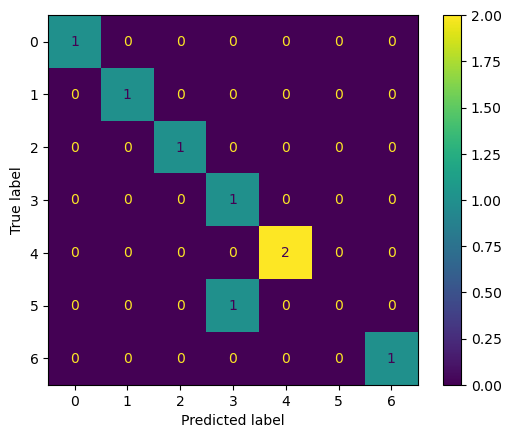

In [1857]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()